# EMA vs Close price - Analytics

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
data = data[data.index > '2020-11-01 00:00:00']

In [5]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-02 09:00:00,900.1,900.2,899.3,900.1,1910
2020-11-02 09:05:00,900.2,900.2,898.7,899.4,1670
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939
...,...,...,...,...,...
2024-11-25 14:25:00,1298.0,1298.3,1296.7,1297.0,5524
2024-11-25 14:30:00,1297.1,1297.1,1297.1,1297.1,161
2024-11-25 14:45:00,1298.4,1298.4,1298.4,1298.4,5627


In [6]:
data["ema_low"] = ta.ema(data["Close"], length=250)
data["diff"] = data.apply(lambda r: r['High'] - r['ema_low'] if r['Close'] > r['ema_low'] else r['ema_low'] - r['Low'], axis=1)
data.dropna(inplace=True)

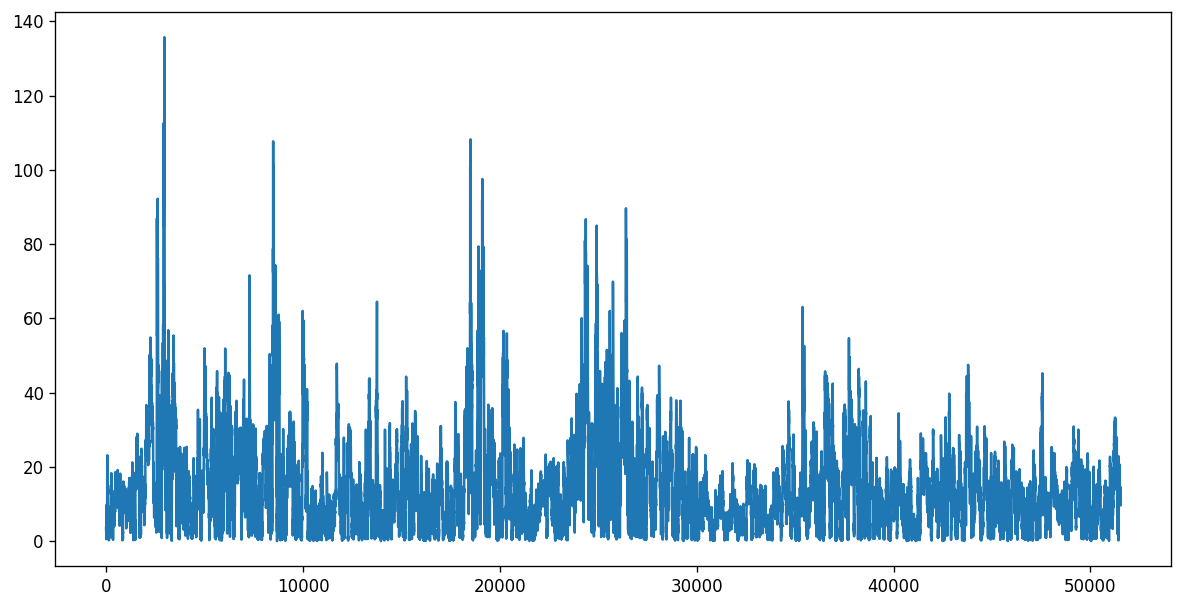

In [8]:
plt.plot(range(0, len(data["diff"])), data["diff"])

In [9]:
back_bar = 25
next_bar = back_bar -1
data['max_prev'] = data['Close'].rolling(back_bar).max()
data['max_next'] = data['Close'].shift(-next_bar).rolling(back_bar).max()
data['min_prev'] = data['Close'].rolling(back_bar).min()
data['min_next'] = data['Close'].shift(-next_bar).rolling(back_bar).min()

In [10]:
data['is_keylevel'] = data.apply(lambda r: True if (r['Close'] == r['max_prev'] and r['Close'] == r['max_next']) or (r['Close'] == r['min_prev'] and r['Close'] == r['min_next']) else False, axis=1)
data.dropna(inplace=True)

In [11]:
has_keylevel = data[data['is_keylevel'] == True]

In [12]:
has_keylevel

,Open,High,Low,Close,Volume,ema_low,diff,max_prev,max_next,min_prev,min_next,is_keylevel
Date,,,,,,,,,,,,
2020-11-09 13:55:00,918.5,918.5,916.0,916.6,5033,911.458637,7.041363,919.8,934.0,916.6,916.6,True
2020-11-10 09:10:00,934.0,934.2,933.8,934.0,1575,912.508695,21.691305,934.0,934.0,916.6,928.0,True
2020-11-10 09:15:00,934.1,934.3,933.8,934.0,1291,912.679941,21.620059,934.0,934.0,916.6,928.0,True
2020-11-10 13:50:00,931.2,932.3,931.2,931.6,4199,917.192786,15.107214,931.6,931.6,927.7,920.8,True
2020-11-11 11:05:00,922.1,922.8,922.1,922.5,1074,918.570042,4.229958,922.5,922.5,920.3,912.6,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-21 10:05:00,1265.8,1266.4,1264.6,1265.4,3926,1276.881593,12.281593,1278.2,1277.8,1265.4,1265.4,True
2024-11-21 10:10:00,1265.4,1265.7,1265.0,1265.4,1179,1276.790106,11.790106,1278.2,1277.8,1265.4,1265.4,True
2024-11-22 09:20:00,1295.6,1298.4,1295.6,1298.4,4192,1276.822893,21.577107,1298.4,1298.4,1270.3,1292.0,True


In [14]:
has_keylevel['diff'] = has_keylevel['diff'].round(0)

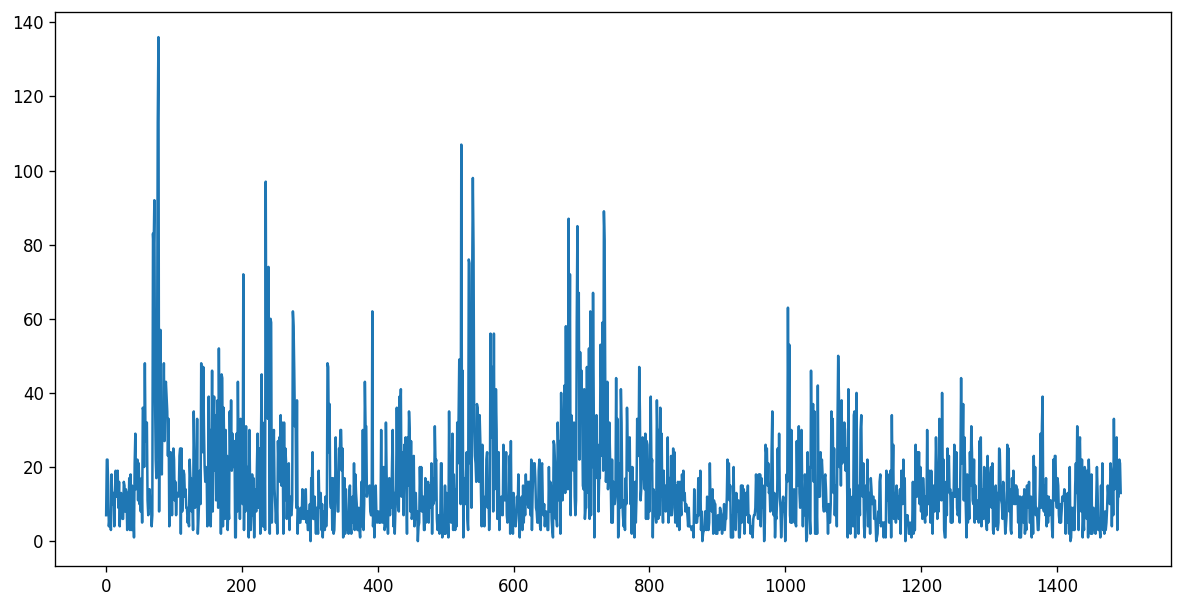

In [15]:
plt.plot(range(0, len(has_keylevel["diff"])), has_keylevel["diff"])

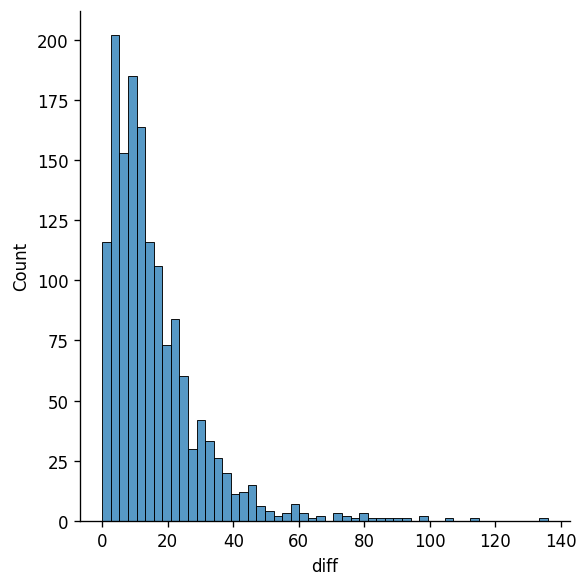

In [20]:
sns.displot(has_keylevel[["diff"]], x="diff")